In [9]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

current_dir = os.getcwd()
PROJ_ROOT = os.path.join(os.path.dirname(os.path.dirname(current_dir)),'Model')
sys.path.insert(0, PROJ_ROOT)

from Car_Dataset import create_dataset

In [10]:
df = create_dataset(eda = True)

In [11]:
df.head()

,folder,image_tensor,car_model,link,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
0,Audi_10064,<PIL.Image.Image image mode=RGB size=224x224 a...,Audi,https://www.otomoto.pl/osobowe/oferta/audi-a6-...,2024,5,5,1 km,Benzyna,Automatyczna,Kombi,1 984 cm3,367 KM,Nowy,313 200
1,Audi_10064,<PIL.Image.Image image mode=RGB size=224x224 a...,Audi,https://www.otomoto.pl/osobowe/oferta/audi-a6-...,2024,5,5,1 km,Benzyna,Automatyczna,Kombi,1 984 cm3,367 KM,Nowy,313 200
2,Audi_10064,<PIL.Image.Image image mode=RGB size=224x224 a...,Audi,https://www.otomoto.pl/osobowe/oferta/audi-a6-...,2024,5,5,1 km,Benzyna,Automatyczna,Kombi,1 984 cm3,367 KM,Nowy,313 200
3,Audi_10064,<PIL.Image.Image image mode=RGB size=224x224 a...,Audi,https://www.otomoto.pl/osobowe/oferta/audi-a6-...,2024,5,5,1 km,Benzyna,Automatyczna,Kombi,1 984 cm3,367 KM,Nowy,313 200
4,Audi_10065,<PIL.Image.Image image mode=RGB size=224x224 a...,Audi,https://www.otomoto.pl/osobowe/oferta/audi-q2-...,2024,5,5,1 km,Benzyna,Manualna,SUV,1 498 cm3,150 KM,Nowy,165 427


In [80]:
df = df.drop(['folder', 'image_tensor'], axis=1)

In [81]:
df.columns

Index(['car_model', 'year', 'door_count', 'nr_seats', 'mileage', 'fuel_type',
       'transmission', 'body type', 'engine displacement', 'engine power',
       'new_or_use', 'price'],
      dtype='object')

In [82]:
df.isnull().sum()

car_model              0
year                   0
door_count             0
nr_seats               0
mileage                0
fuel_type              0
transmission           0
body type              0
engine displacement    0
engine power           0
new_or_use             0
price                  0
dtype: int64

In [83]:
(df == '').sum()

car_model                0
year                    10
door_count              10
nr_seats               228
mileage                  0
fuel_type                0
transmission             0
body type                0
engine displacement      5
engine power             0
new_or_use               0
price                    0
dtype: int64

In [84]:
df[df['year'] == ""]

,car_model,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
754,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
755,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
756,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
757,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
758,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
759,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
760,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
761,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
762,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800
763,Opel,,,,147 000 km,Benzyna,Manualna,Kombi,1 598 cm3,115 KM,Używany,36 800


In [85]:
df[df['engine displacement'] == ""]

,car_model,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
1722,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1723,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1724,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1725,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1726,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900


In [86]:
df[df['fuel_type'] == "Elektryczny"]

,car_model,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
1722,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1723,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1724,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1725,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900
1726,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,,204 KM,Nowy,199 900


### ELECTRIC CARS DON'T HAVE ENGINE DISPLACEMENT.

In [87]:
df.loc[df['fuel_type'] == 'Elektryczny', 'engine displacement'] = 0

In [88]:
df[df['fuel_type'] == "Elektryczny"]

,car_model,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
1722,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,0,204 KM,Nowy,199 900
1723,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,0,204 KM,Nowy,199 900
1724,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,0,204 KM,Nowy,199 900
1725,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,0,204 KM,Nowy,199 900
1726,Volkswagen,2023,5,5,1 km,Elektryczny,Automatyczna,Kompakt,0,204 KM,Nowy,199 900


<h3> We can assume that most of the cars have 5 seat </h3>
<h3>we have to map number of doors to be equal 3 or 5. </h3>

In [89]:
df['door_count'].value_counts()

5    1414
4     216
2      53
3      42
       10
Name: door_count, dtype: int64

In [90]:
df['nr_seats'].value_counts()

5    1417
      228
7      38
4      34
6       7
9       6
2       5
Name: nr_seats, dtype: int64

In [91]:
df[df['door_count'] == '4'].head()

,car_model,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
23,Audi,2014,4,5,194 500 km,Benzyna,Automatyczna,Sedan,3 993 cm3,435 KM,Używany,99 000
24,Audi,2014,4,5,194 500 km,Benzyna,Automatyczna,Sedan,3 993 cm3,435 KM,Używany,99 000
25,Audi,2014,4,5,194 500 km,Benzyna,Automatyczna,Sedan,3 993 cm3,435 KM,Używany,99 000
26,Audi,2014,4,5,194 500 km,Benzyna,Automatyczna,Sedan,3 993 cm3,435 KM,Używany,99 000
27,Audi,2014,4,5,194 500 km,Benzyna,Automatyczna,Sedan,3 993 cm3,435 KM,Używany,99 000


In [92]:
df[df['door_count'] == '3'].head()

,car_model,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
287,BMW,2007,3,4,146 000 km,Benzyna,Automatyczna,Auta miejskie,1 995 cm3,143 KM,Używany,22 500
344,BMW,2009,3,5,240 000 km,Diesel,Manualna,Kompakt,1 995 cm3,143 KM,Używany,16 000
510,Ford,2014,3,5,151 900 km,Benzyna,Manualna,Auta małe,998 cm3,100 KM,Używany,21 500
511,Ford,2014,3,5,151 900 km,Benzyna,Manualna,Auta małe,998 cm3,100 KM,Używany,21 500
512,Ford,2014,3,5,151 900 km,Benzyna,Manualna,Auta małe,998 cm3,100 KM,Używany,21 500


In [93]:
df[df['door_count'] == '2'].head()

,car_model,year,door_count,nr_seats,mileage,fuel_type,transmission,body type,engine displacement,engine power,new_or_use,price
192,Audi,2010,2,,320 000 km,Diesel,Automatyczna,Coupe,2 698 cm3,190 KM,Używany,38 900
193,Audi,2010,2,,320 000 km,Diesel,Automatyczna,Coupe,2 698 cm3,190 KM,Używany,38 900
194,Audi,2010,2,,320 000 km,Diesel,Automatyczna,Coupe,2 698 cm3,190 KM,Używany,38 900
195,Audi,2010,2,,320 000 km,Diesel,Automatyczna,Coupe,2 698 cm3,190 KM,Używany,38 900
196,Audi,2010,2,,320 000 km,Diesel,Automatyczna,Coupe,2 698 cm3,190 KM,Używany,38 900


In [94]:
door_mapper = {'2': '3', '4': '5'}
df['door_count'] = df['door_count'].apply(lambda x: door_mapper.get(x,x))

In [95]:
df['door_count'].value_counts()

5    1630
3      95
       10
Name: door_count, dtype: int64

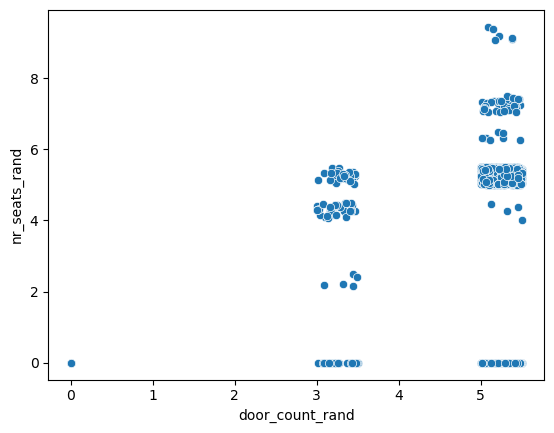

In [96]:
df['door_count_rand'] = df['door_count'].apply(lambda x: int(x) + np.random.uniform(0,0.5) if x != "" else 0)
df['nr_seats_rand'] = df['nr_seats'].apply(lambda x: int(x) + np.random.uniform(0, 0.5) if x != "" else 0)

sns.scatterplot(data = df, x = 'door_count_rand', y = 'nr_seats_rand')

df = df.drop(['door_count_rand', 'nr_seats_rand'], axis=1)

In [97]:
df = df.drop('nr_seats', axis=1)

In [98]:
df.columns

Index(['car_model', 'year', 'door_count', 'mileage', 'fuel_type',
       'transmission', 'body type', 'engine displacement', 'engine power',
       'new_or_use', 'price'],
      dtype='object')

In [99]:
df.shape

(1735, 11)

In [100]:
df = df.replace("", np.nan)
df = df.dropna()

In [101]:
df.shape

(1725, 11)

### PLOTS 

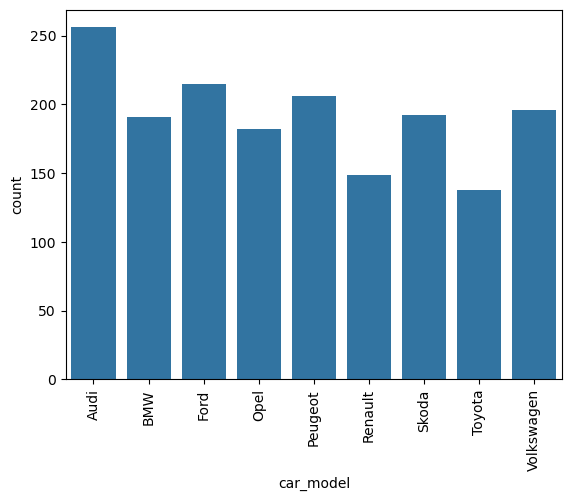

In [102]:
sns.countplot(data = df, x = 'car_model')
plt.xticks(rotation=90)
plt.show()

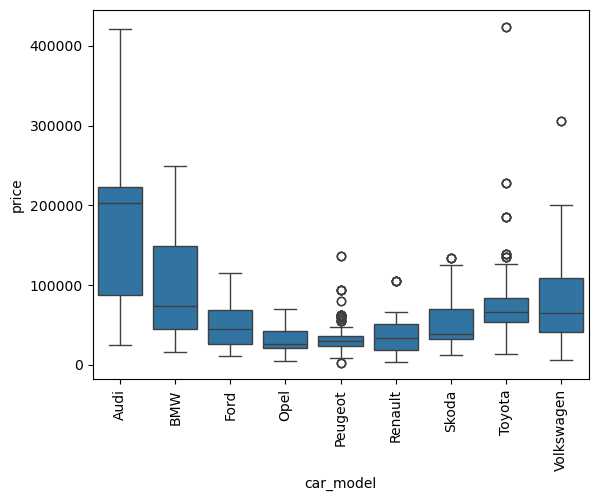

In [103]:
df['price'] = df['price'].apply(lambda x: float(x.replace(" ","").replace(",",".")))
sns.boxplot(df, x = 'car_model', y = 'price')
plt.xticks(rotation=90)
plt.show()

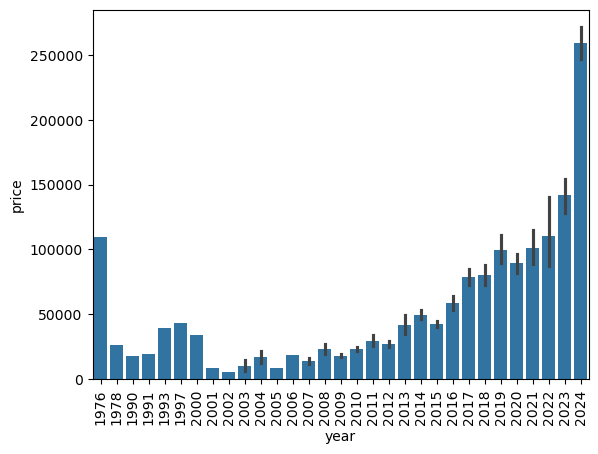

In [104]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
sns.barplot(df, x = 'year', y = 'price', estimator='mean')
plt.xticks(rotation=90)
plt.show()

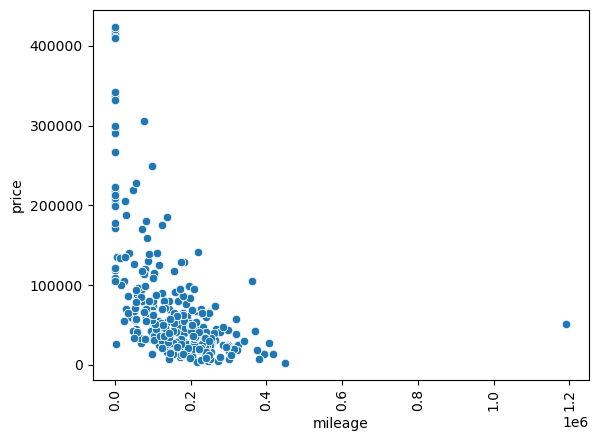

In [105]:
df['mileage'] = df['mileage'].apply(lambda x: int(x.split(' km')[0].replace(' ','')))
sns.scatterplot(df, x = 'mileage', y = 'price')
plt.xticks(rotation=90)
plt.show()

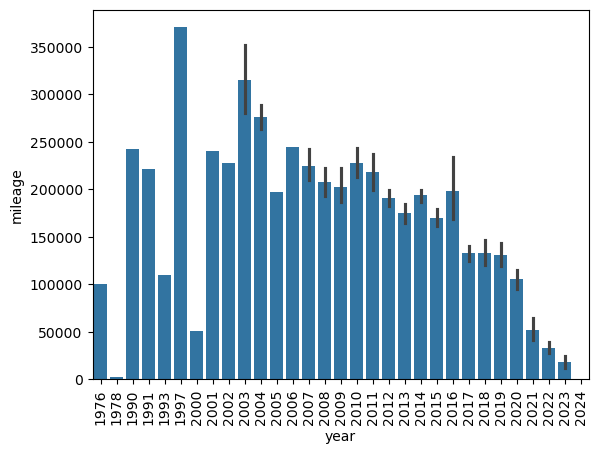

In [106]:
sns.barplot(df, x = 'year', y = 'mileage', estimator='mean')
plt.xticks(rotation=90)
plt.show()

In [107]:
df['fuel_type'].value_counts()

Diesel         903
Benzyna        748
Benzyna+LPG     41
Hybryda         28
Elektryczny      5
Name: fuel_type, dtype: int64

In [108]:
df['transmission'].value_counts()

Automatyczna    869
Manualna        856
Name: transmission, dtype: int64

In [109]:
df['body type'].value_counts()

Kombi            505
SUV              374
Sedan            343
Kompakt          220
Minivan          157
Auta miejskie     53
Coupe             33
Auta małe         24
Kabriolet         16
Name: body type, dtype: int64

<Axes: xlabel='fuel_type', ylabel='price'>

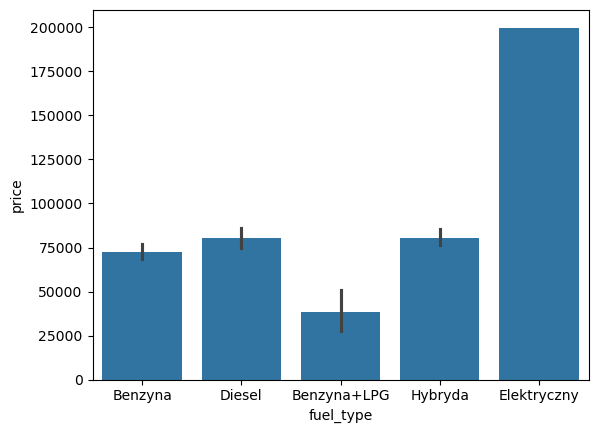

In [110]:
sns.barplot(df, x = 'fuel_type', y = 'price')

<Axes: xlabel='transmission', ylabel='price'>

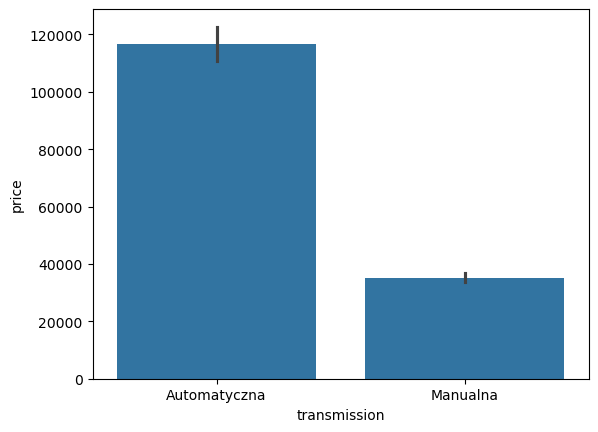

In [111]:
sns.barplot(df, x = 'transmission', y = 'price')

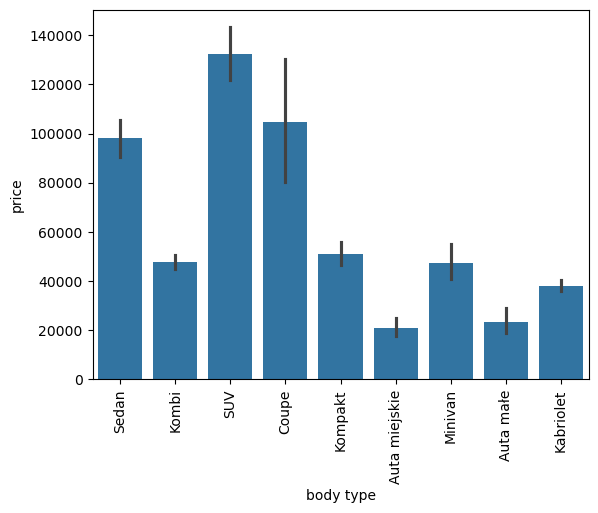

In [112]:
sns.barplot(df, x = 'body type', y = 'price')
plt.xticks(rotation=90)
plt.show()

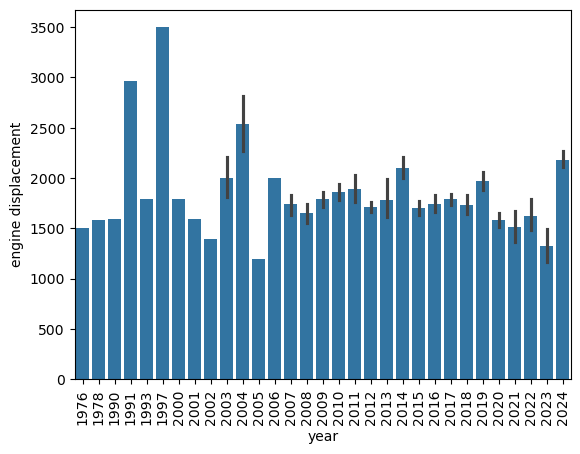

In [113]:
df['engine displacement'] = df['engine displacement'].apply(lambda x: int(x.split(' cm3')[0].replace(' ','')) if x != 0 else 0)
sns.barplot(df, x = 'year', y = 'engine displacement')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='engine displacement', ylabel='price'>

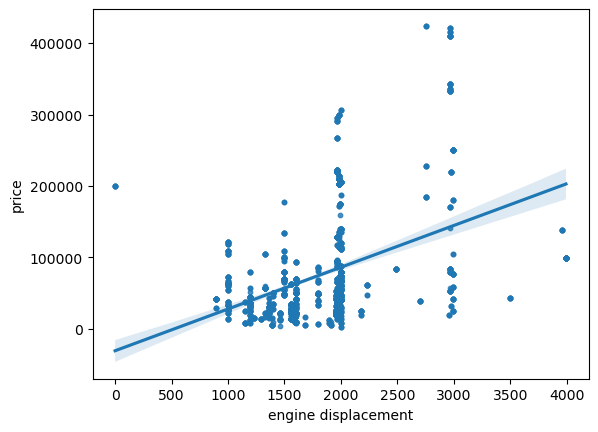

In [114]:
sns.regplot(data=df, x='engine displacement', y='price', scatter_kws={'s':10})

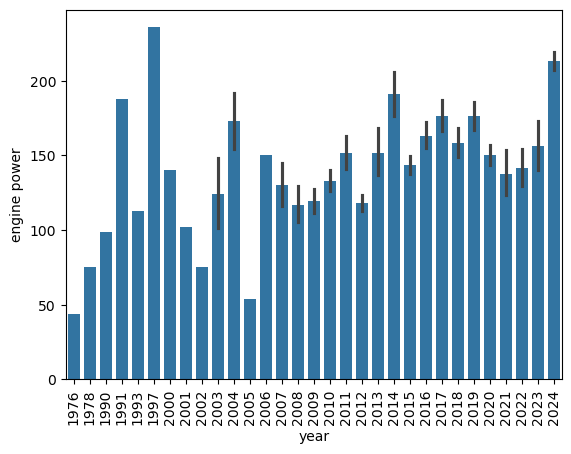

In [115]:
df['engine power'] = df['engine power'].apply(lambda x: int(x.split(' KM')[0].replace(' ','')))
sns.barplot(df, x = 'year', y = 'engine power')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='engine power', ylabel='price'>

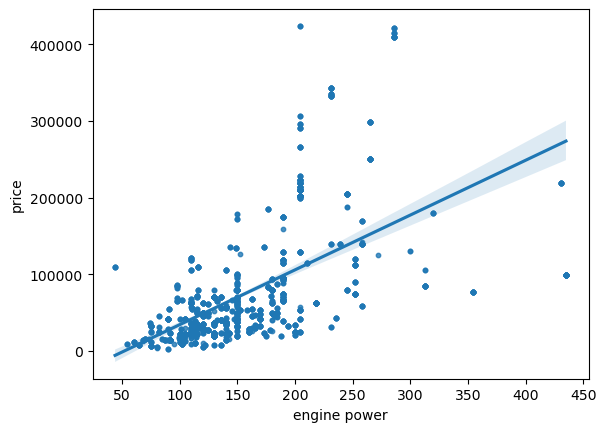

In [116]:
sns.regplot(data=df, x='engine power', y='price', scatter_kws={'s':10})

<Axes: xlabel='new_or_use', ylabel='count'>

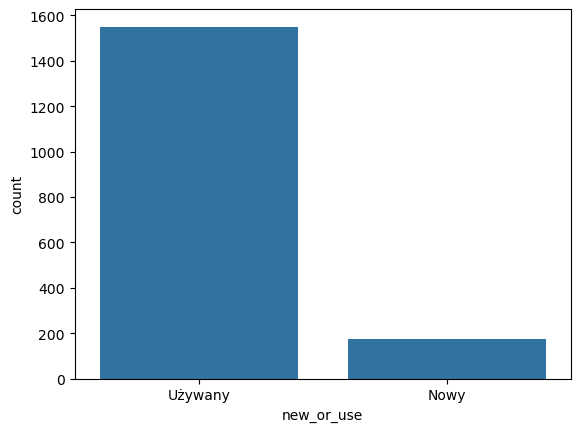

In [117]:
sns.countplot(df, x = 'new_or_use')

<Axes: xlabel='new_or_use', ylabel='price'>

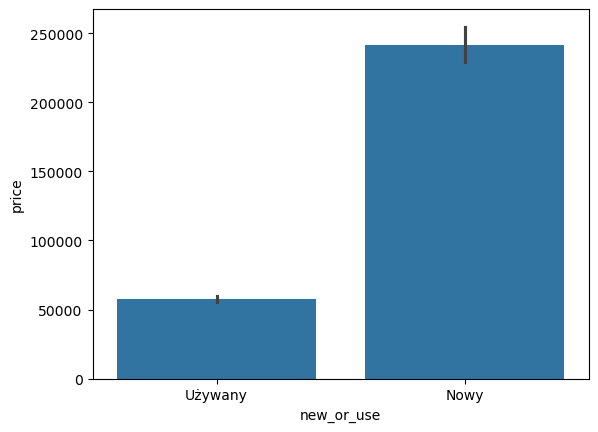

In [118]:
sns.barplot(df, x = 'new_or_use', y = 'price')

In [119]:
df_encoded = pd.get_dummies(df, columns=['fuel_type', 'transmission', 'car_model', 'body type', 'new_or_use'], drop_first=True)

In [120]:
df_encoded

,year,door_count,mileage,engine displacement,engine power,price,fuel_type_Benzyna+LPG,fuel_type_Diesel,fuel_type_Elektryczny,fuel_type_Hybryda,...,car_model_Volkswagen,body type_Auta miejskie,body type_Coupe,body type_Kabriolet,body type_Kombi,body type_Kompakt,body type_Minivan,body type_SUV,body type_Sedan,new_or_use_Używany
0,2018,5,65819,1984,190,87900.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2013,5,188000,2967,313,84000.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2013,5,188000,2967,313,84000.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2013,5,188000,2967,313,84000.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2013,5,188000,2967,313,84000.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2023,5,1,999,110,121500.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1731,2023,5,1,999,110,121500.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1732,2023,5,1,999,110,121500.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1733,2024,5,1,1498,150,178000.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
